# PCA - Predição de pagamento de empréstimos

# Importando os pacotes

In [268]:
import pandas as pd # Utilização de datasets
import matplotlib.pyplot as plt # Visualização dos gráficos
import numpy as np # Utilização de analise de dados
from sklearn.preprocessing import StandardScaler # Normalização dados
import seaborn as sns

In [269]:
# Importando o Dataset e atribuindo as variáveis, conforme a Tabela 1: Esquema do conjunto de dados com histórico de clientes.
# O conjunto de dados a ser utilizado para treinamento(treino) e testes(testes).

In [270]:
column_names = ['Esct','Ndep','Renda', 'Tipor', 'Vbem', 'Nparc', 'Vparc', 'Tel', 'Idade', 'Resms', 'Entrada', 'Classe']

df_treino = pd.read_table('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtrain.txt', names=column_names, header=None)

df_teste = pd.read_table('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtest.txt', names=column_names, header=None)


In [271]:
# Validando o tamanho dos dataset's
df_treino.shape, df_teste.shape

((1500, 12), (577, 12))

In [272]:
df_treino.describe()

,Esct,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [273]:
df_treino = pd.get_dummies(data=df_treino, prefix="Esct", columns=["Esct"], drop_first=True)

df_teste = pd.get_dummies(data=df_teste, prefix="Esct", columns=["Esct"], drop_first=True)


In [274]:
df_treino.head(5)

,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe,Esct_1,Esct_2,Esct_3
0,0,360,0,313,9,52,0,25,48,0,1,True,False,False
1,0,350,1,468,10,65,0,33,6,0,1,False,False,False
2,0,1100,0,829,9,125,0,56,48,0,1,False,False,False
3,0,3000,0,552,12,76,1,31,60,0,1,False,False,False
4,0,1000,0,809,12,111,0,24,7,0,1,True,False,False


In [275]:
df_teste.describe()

,Ndep,Renda,Tipor,Vbem,Nparc,Vparc,Tel,Idade,Resms,Entrada,Classe
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.110919,930.623917,0.452340,568.377816,8.402080,103.755633,0.112652,41.188908,29.270364,26.528596,0.469671
std,0.511841,876.614452,0.498155,352.600280,3.633065,67.692428,0.316441,13.477631,50.100313,90.786052,0.499512
min,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,475.000000,0.000000,399.000000,6.000000,66.000000,0.000000,30.000000,6.000000,0.000000,0.000000
50%,0.000000,600.000000,0.000000,489.000000,10.000000,85.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,0.000000,1000.000000,1.000000,623.000000,10.000000,117.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,5.000000,9675.000000,1.000000,6000.000000,21.000000,719.000000,1.000000,70.000000,360.000000,1150.000000,1.000000


In [276]:
# Ajustando os conjuntos de treinamento e teste.

X_treino = df_treino.drop('Classe', axis=1)
X_treino = np.array(X_treino).astype(float)
y_treino = df_treino['Classe']

X_teste = df_teste.drop('Classe', axis=1)
X_teste = np.array(X_teste).astype(float)
y_teste = df_teste['Classe']

X_treino = df_treino.drop('Classe', axis=1).values.astype(float)
y_treino = df_treino['Classe'].values

In [277]:
#Normalização

norm = StandardScaler()

X_treino = norm.fit_transform(X_treino)
X_teste = norm.transform(X_teste)

print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(1500, 13) (577, 13) (1500,) (577,)


In [278]:
# Validação dos Dados Normalizados

X_treino_df = pd.DataFrame(X_treino)
X_teste_df = pd.DataFrame(X_teste)

print(X_treino_df)
print(X_teste_df)

            0         1         2         3         4         5         6   \
0    -0.221185 -0.689892 -0.896038 -0.937611  0.168333 -0.798003 -0.393363   
1    -0.221185 -0.700939  1.116024 -0.354031  0.445500 -0.591544 -0.393363   
2    -0.221185  0.127578 -0.896038  1.005145  0.168333  0.361347 -0.393363   
3    -0.221185  2.226490 -0.896038 -0.037768  0.999835 -0.416847  2.542181   
4    -0.221185  0.017109 -0.896038  0.929845  0.999835  0.139006 -0.393363   
...        ...       ...       ...       ...       ...       ...       ...   
1495 -0.221185 -0.535236 -0.896038 -0.470747  0.999835 -0.670951 -0.393363   
1496 -0.221185  1.184767 -0.896038 -0.982791 -2.049006  3.426477 -0.393363   
1497 -0.221185 -0.457907 -0.896038 -0.192135  0.999835 -0.496255  2.542181   
1498 -0.221185 -0.689892 -0.896038 -0.670293  0.999835 -0.798003 -0.393363   
1499  6.763592 -0.534131  1.116024  1.080446  0.445500  0.234295 -0.393363   

            7         8         9         10        11       12

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_treino)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

### Dataset Treino

[2.39925855 1.64959654 1.35397474 1.18223291 1.02167591 0.91064281
 0.86462779 0.80969713 0.76107808 0.7048093  0.63712553 0.56828325
 0.14566991]


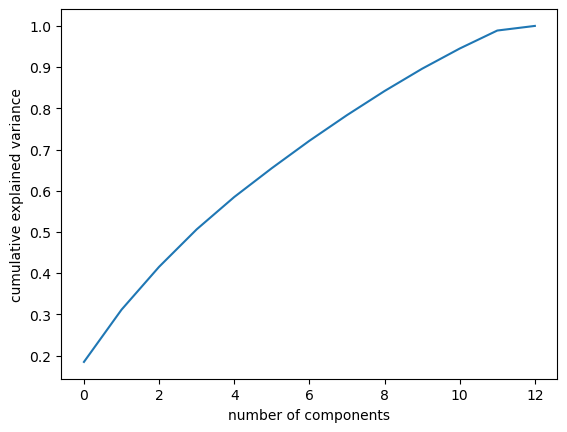

In [280]:
pca = PCA().fit(X_treino)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [281]:
finalDf = pd.concat([principalDf, df_treino[['Classe']]], axis = 1)

In [282]:
pca.explained_variance_ratio_

array([0.18443531, 0.12680745, 0.10408247, 0.09088037, 0.07853806,
       0.07000275, 0.06646549, 0.06224287, 0.05850544, 0.05417996,
       0.04897698, 0.04368495, 0.01119791])

In [283]:
pca.n_components_

13

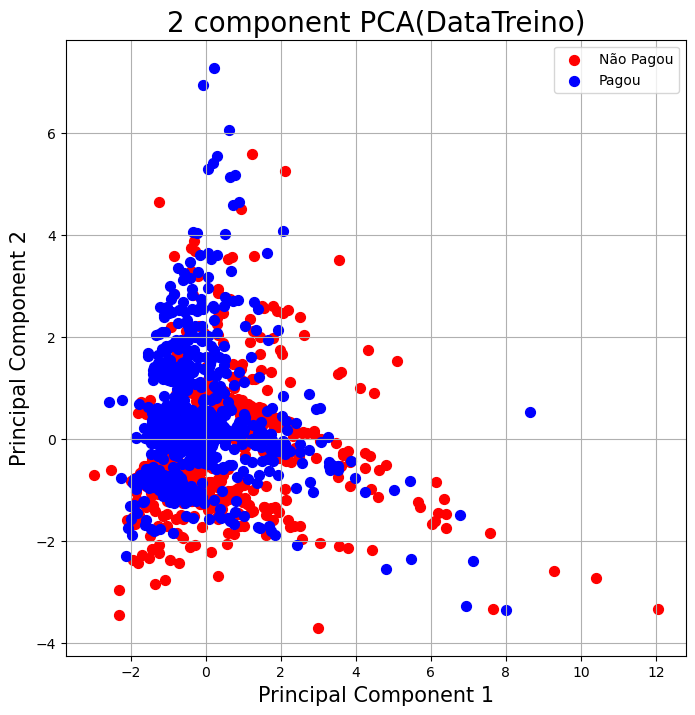

In [284]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA(DataTreino)', fontsize=20)

# Mapeamento de classes para rótulos
class_labels = {0: 'Não Pagou', 1: 'Pagou'}

targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Classe'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=class_labels[target])

# Adicionar legenda com rótulos
ax.legend()
ax.grid()

plt.show()


In [285]:
finalDf.columns

Index(['principal component 1', 'principal component 2', 'Classe'], dtype='object')

In [286]:
finalDf.dtypes

principal component 1    float64
principal component 2    float64
Classe                     int64
dtype: object

In [287]:
finalDf.isna().sum()

principal component 1    0
principal component 2    0
Classe                   0
dtype: int64

In [288]:
finalDf.describe()

,principal component 1,principal component 2,Classe
count,1.500000e+03,1.500000e+03,1500.000000
mean,-9.473903e-18,-9.473903e-18,0.476667
std,1.548954e+00,1.284366e+00,0.499622
min,-2.973974e+00,-3.704356e+00,0.000000
25%,-1.032326e+00,-8.468434e-01,0.000000
50%,-3.915878e-01,-1.579537e-01,0.000000
75%,6.139520e-01,5.337731e-01,1.000000
max,1.204146e+01,7.281625e+00,1.000000


### Dataset Teste

[2.78018794 1.96956903 1.57684383 1.27733721 1.09943285 0.90995214
 0.82969643 0.77259835 0.74325105 0.65637626 0.59294028 0.51699483
 0.17133895]


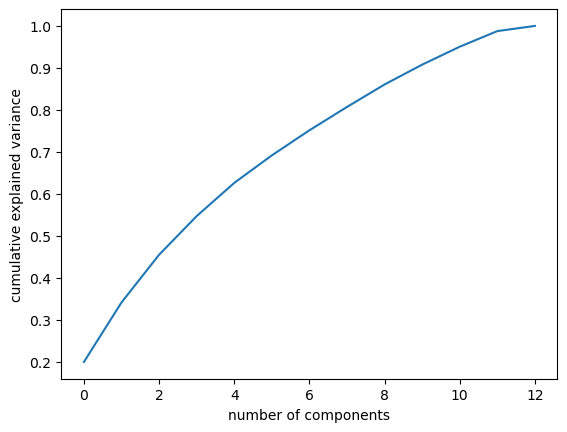

In [289]:
pca = PCA().fit(X_teste)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [290]:
finalDf = pd.concat([principalDf, df_teste[['Classe']]], axis = 1)

In [291]:
pca.explained_variance_ratio_

array([0.20006362, 0.14173111, 0.11347042, 0.09191778, 0.0791157 ,
       0.06548058, 0.05970534, 0.05559654, 0.05348469, 0.04723314,
       0.04266826, 0.03720319, 0.01232963])

In [292]:
pca.n_components_

13

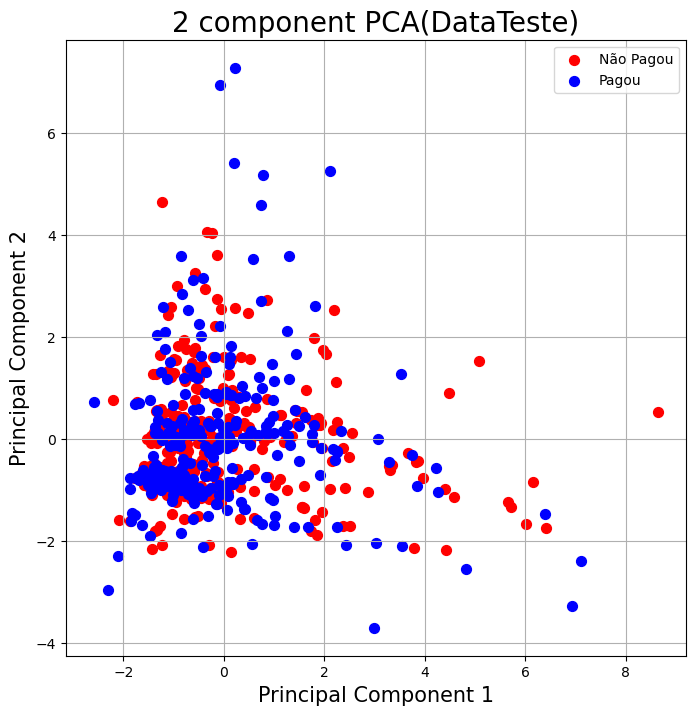

In [293]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA(DataTeste)', fontsize=20)

# Mapeamento de classes para rótulos
class_labels = {0: 'Não Pagou', 1: 'Pagou'}

targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Classe'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=class_labels[target])

# Adicionar legenda com rótulos
ax.legend()
ax.grid()

plt.show()


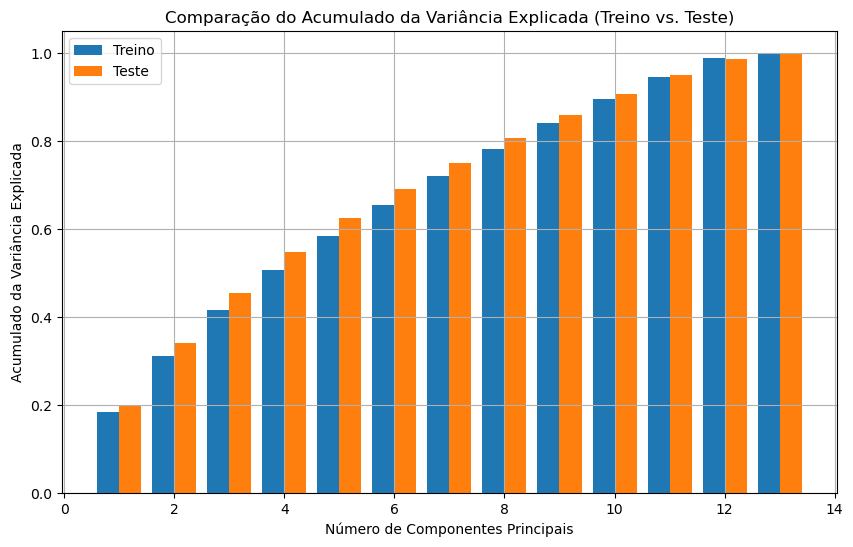

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# Variâncias explicadas para os conjuntos de treino e teste
variance_ratio_teste = np.array([0.20006362, 0.14173111, 0.11347042, 0.09191778, 0.0791157 ,
                                 0.06548058, 0.05970534, 0.05559654, 0.05348469, 0.04723314,
                                 0.04266826, 0.03720319, 0.01232963])

variance_ratio_treino = np.array([0.18443531, 0.12680745, 0.10408247, 0.09088037, 0.07853806,
                                0.07000275, 0.06646549, 0.06224287, 0.05850544, 0.05417996,
                                0.04897698, 0.04368495, 0.01119791])

# Acumulado das variâncias explicadas
cumulative_variance_treino = np.cumsum(variance_ratio_treino)
cumulative_variance_teste = np.cumsum(variance_ratio_teste)

# Número de componentes principais
components = np.arange(1, len(variance_ratio_treino) + 1)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(components - 0.2, cumulative_variance_treino, width=0.4, label='Treino', align='center')
plt.bar(components + 0.2, cumulative_variance_teste, width=0.4, label='Teste', align='center')

plt.xlabel('Número de Componentes Principais')
plt.ylabel('Acumulado da Variância Explicada')
plt.title('Comparação do Acumulado da Variância Explicada (Treino vs. Teste)')
plt.legend()
plt.grid(True)
plt.show()


O desempenho dos conjuntos são bem parecidos, sendo o conjunto de testes um pouco melhor